In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
import os
import pandas as pd

# 掛載 Google Drive
drive.mount('/content/drive')

# 指定 CSV 檔案的資料夾路徑
folder_path = '/content/drive/MyDrive/BPO/每天上課人數/上課人數資料'

# 找出所有 .csv 檔案
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# 建立一個 dict 來存所有 DataFrame
dataframes = {}

# 讀取每一個 CSV 檔案
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    df_name = file.replace('.csv', '')
    try:
        dataframes[df_name] = pd.read_csv(file_path)
        print(f"✅ 讀取成功：{file}")
    except Exception as e:
        print(f"❌ 讀取失敗：{file}，錯誤：{e}")

# 檢查讀入結果
print("\n📦 總共讀入資料數：", len(dataframes))
print("📄 檔名清單：", list(dataframes.keys()))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ 讀取成功：nccu_commerce_courses.csv
✅ 讀取成功：nccu_整開.csv
✅ 讀取成功：nccu_輔系專班.csv
✅ 讀取成功：nccu_體育.csv
✅ 讀取成功：nccu_校級不分院.csv
✅ 讀取成功：nccu_文學院.csv
✅ 讀取成功：nccu_社會科學學院.csv
✅ 讀取成功：nccu_傳播學院.csv
✅ 讀取成功：nccu_外國語文學院.csv
✅ 讀取成功：nccu_法學院.csv
✅ 讀取成功：nccu_理學院.csv
✅ 讀取成功：nccu_國際事務學院.csv
✅ 讀取成功：nccu_教育學院.csv
✅ 讀取成功：nccu_創新國際學院.csv
✅ 讀取成功：nccu_資訊學院.csv
✅ 讀取成功：nccu_X實驗學院.csv

📦 總共讀入資料數： 16
📄 檔名清單： ['nccu_commerce_courses', 'nccu_整開', 'nccu_輔系專班', 'nccu_體育', 'nccu_校級不分院', 'nccu_文學院', 'nccu_社會科學學院', 'nccu_傳播學院', 'nccu_外國語文學院', 'nccu_法學院', 'nccu_理學院', 'nccu_國際事務學院', 'nccu_教育學院', 'nccu_創新國際學院', 'nccu_資訊學院', 'nccu_X實驗學院']


In [ ]:
combined_df = pd.concat(dataframes.values(), ignore_index=True)
print("📊 合併後資料筆數：", len(combined_df))
combined_df.head()


📊 合併後資料筆數： 3173


,subject,teacher,time_detail,all_colleges_registered,classroom
0,學術倫理,別蓮蒂,五EFG,24,商館260210
1,跨文化創新創業專題研討,張欣綠,五E,16,教室洽系所
2,商業資料分析：R運算,侯佩妤,四D56,6,商館260714
3,AI協作行銷,白佩玉、陳冠儒,二234,16,商館260712
4,多元職場,胡昌亞,五234,8,商館260712


In [ ]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3173 entries, 0 to 3172
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   subject                  3173 non-null   object
 1   teacher                  3173 non-null   object
 2   time_detail              3173 non-null   object
 3   all_colleges_registered  3173 non-null   int64 
 4   classroom                3173 non-null   object
dtypes: int64(1), object(4)
memory usage: 124.1+ KB


In [ ]:
# 檢查資料型態，有時候數字會被讀成字串
combined_df['all_colleges_registered'] = pd.to_numeric(combined_df['all_colleges_registered'], errors='coerce')

# 篩選人數為 0 的列
zero_registered = combined_df[combined_df['all_colleges_registered'] == 0]

# 顯示結果
zero_registered


,subject,teacher,time_detail,all_colleges_registered,classroom
100,政府財務報導,賴森本,二234,0,商館260815
126,管理經濟學（二）,王國樑,二78E,0,綜北270204
195,行銷管理,鄭濬浩,四234,0,無資料
276,進階資訊系統研發,蕭舜文,三D56,0,無資料
307,跨國併購研討,陳嬿如,一567,0,無資料
...,...,...,...,...,...
3121,數據網路,蔡子傑,五234,0,無資料
3124,專題討論（Ⅳ）,詳備註,一56,0,無資料
3135,進階遊戲引擎應用開發,周大鈞,三EFG,0,無資料
3151,進階資訊系統研發,蕭舜文,三D56,0,無資料


In [ ]:
# 確保欄位名稱沒有空白
combined_df.columns = combined_df.columns.str.strip()

# 轉成數值型態（避免是字串）
combined_df['all_colleges_registered'] = pd.to_numeric(combined_df['all_colleges_registered'], errors='coerce')

# 刪除人數為 0 的列
filtered_df = combined_df[combined_df['all_colleges_registered'] != 0]




In [ ]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, 0 to 3172
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   subject                  3000 non-null   object
 1   teacher                  3000 non-null   object
 2   time_detail              3000 non-null   object
 3   all_colleges_registered  3000 non-null   int64 
 4   classroom                3000 non-null   object
dtypes: int64(1), object(4)
memory usage: 140.6+ KB


In [ ]:
filtered_df.classroom.unique()

array(['商館260210', '教室洽系所', '商館260714', '商館260712', '商館260306',
       '學思040201', '學思040208', '研究250303', '寶來國際廳', '商館260305',
       '商館260102', '炎成創新廳', '商館260106', '商館260105', '學思040103', '元大人文廳',
       '寶來科技廳', '商館260205', '學思040306', '資訊140106', '研究250105',
       '商館260312', '商館260207', '商館260206', '商館260313', '逸仙050101',
       '商館260304', '商院261042', '逸仙050201', ' 無資料', '商院261047', '資訊140208',
       '研究250103', '商館260101', '研究250201', '資訊140306', '商館260705', '元大講堂',
       '資訊140206', '學思040202', '學思040302', '商館260815', '商館260310',
       '資訊140301', '商院電腦室', '研究250206', '逸仙5樓資管電腦室', '電算智慧教室', '商館260311',
       '商館260302', '電算微二室', '商館260301', '商館260204', '商館261049',
       '商館260202', '商館261148', '秀明講堂', '商館260201', '資訊140207', '統計研討室',
       '商館260713', '商館260809', '商館260709', '電算微三室', '大仁200401資科電腦室',
       '專案研究室', '保險研討室', '商館260914', '商館260909', '商館260913', '商館260912',
       '商館260908', '綜北270306', '綜合271408', '綜合中央大教室 (270751)', '綜北270202',
       '資訊140307', '綜南2

In [ ]:
len(filtered_df.classroom.unique())

362

In [ ]:
# 取得不重複的教室名稱，移除空值，並依照字母順序排序
sorted_classrooms = sorted(filtered_df['classroom'].unique())

# 顯示結果
for room in sorted_classrooms:
    print(room)


 無資料
井塘020101
井塘020110
井塘020111
井塘020112
井塘020113
井塘020413
井塘電腦室020213
人偉講堂
保險研討室
傳播310206
傳播310207
傳播310309
傳播310310
傳播310311
傳播310431
傳播排演室
傳院劇場
元大人文廳
元大講堂
創意實驗室
商院261042
商院261047
商院電腦室
商館260101
商館260102
商館260105
商館260106
商館260201
商館260202
商館260204
商館260205
商館260206
商館260207
商館260209
商館260210
商館260301
商館260302
商館260304
商館260305
商館260306
商館260307
商館260308
商館260310
商館260311
商館260312
商館260313
商館260315
商館260316
商館260705
商館260709
商館260712
商館260713
商館260714
商館260809
商館260815
商館260908
商館260909
商館260912
商館260913
商館260914
商館261049
商館261148
國際360201
國際360202
國際360301
國際360304
國際360406
國際360408
國際360501
國際360611
大仁200101
大仁200102
大仁200106
大仁200201
大仁200301
大仁200401資科電腦室
大勇210101
大勇210102
大勇210103
大勇210104
大勇210105
大勇210106
大勇210201
大勇210202
大勇210204
大勇210205
大勇210206
大勇210207
大勇210207大勇210401
大勇210208
大勇210301
大勇210315
大勇210316
大勇210401
大勇210402
大勇210403
大勇210404
大勇210405
大勇210417
大智190101
大智190202
大智190204
大智190304
大智190305
大智190306
季陶340107
季陶340108
季陶340302
季陶340304
季陶340305
季陶340309
季陶34031

In [ ]:
# 定義特殊教室清單
special_rooms = [
    '玉山國際廳',
    '商學院會議室',
    '商院第1會議室',
    '商院第2會議室',
    '頂尖學園',
    '元大講堂',
    '元大人文廳',
    '炎成創新廳',
    '寶來科技廳',
    '寶來國際廳',
    '義育廳'
]

# 先清理欄位空白
filtered_df['classroom'] = filtered_df['classroom'].str.strip()

# 過濾出所有教室名稱為 special_rooms 或以「商館」開頭的列
selected_rooms_df = filtered_df[
    filtered_df['classroom'].isin(special_rooms) |
    filtered_df['classroom'].str.startswith('商館', na=False)
]

# 顯示前幾筆資料
print(f"✅ 共找到 {len(selected_rooms_df)} 筆資料")
selected_rooms_df.head()


✅ 共找到 383 筆資料


<ipython-input-13-4bdd071e58c0>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['classroom'] = filtered_df['classroom'].str.strip()


,subject,teacher,time_detail,all_colleges_registered,classroom
0,學術倫理,別蓮蒂,五EFG,24,商館260210
2,商業資料分析：R運算,侯佩妤,四D56,6,商館260714
3,AI協作行銷,白佩玉、陳冠儒,二234,16,商館260712
4,多元職場,胡昌亞,五234,8,商館260712
5,企業永續、ESG與社會責任,許永明,五234,45,商館260306


In [ ]:
# 取出時間字串的第一個字元（代表星期幾）
selected_rooms_df["weekday"] = selected_rooms_df["time_detail"].str[0]

# 篩選出星期一的課程
monday_df = selected_rooms_df[selected_rooms_df["weekday"] == "一"]

# 顯示前幾筆確認
print("✅ 星期一的上課資料共有", len(monday_df), "筆：")
monday_df.head(46)  # 如想顯示更多筆，請調整數字


✅ 星期一的上課資料共有 46 筆：


<ipython-input-14-d3a8ecf0adaa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rooms_df["weekday"] = selected_rooms_df["time_detail"].str[0]


,subject,teacher,time_detail,all_colleges_registered,classroom,weekday
26,ESG專題研討：永續發展趨勢、機會與挑戰,蘇威傑,一D56,4,寶來國際廳,一
27,ESG專題研討：永續發展趨勢、機會與挑戰,蘇威傑,一D56,21,寶來國際廳,一
41,大數據品牌行銷,高端訓,一567,13,商館260712,一
56,Python入門與商業分析應用,鍾令德,一D56,43,商館260205,一
76,計算機程式設計,蔡銘峰,一D56,47,商館260312,一
82,計量經濟學,金帛春,一D56,21,商館260101,一
132,大數據品牌行銷,高端訓,一567,13,商館260712,一
135,銷售與顧客關係管理,巫立宇,一567,40,炎成創新廳,一
137,資料庫管理,周致遠,一D56,66,商館260210,一
161,不動產財務,陳明吉,一D56,28,商館260311,一


In [ ]:
monday_df["all_colleges_registered"].sum()


np.int64(1420)

In [ ]:
# 建立星期順序（保證排序一致）
weekday_order = ["一", "二", "三", "四", "五", "六", "日"]

# 從 time_detail 擷取第一個字（星期幾）
selected_rooms_df["weekday"] = selected_rooms_df["time_detail"].str[0]

# 將 weekday 設為有順序的類別，方便排序
selected_rooms_df["weekday"] = pd.Categorical(selected_rooms_df["weekday"], categories=weekday_order, ordered=True)

# 依 weekday 排序
sorted_by_weekday_df = selected_rooms_df.sort_values(by="weekday")

# 顯示排序結果（前 10 筆）
sorted_by_weekday_df.head(50)


<ipython-input-16-8acadabf4864>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rooms_df["weekday"] = selected_rooms_df["time_detail"].str[0]
<ipython-input-16-8acadabf4864>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rooms_df["weekday"] = pd.Categorical(selected_rooms_df["weekday"], categories=weekday_order, ordered=True)


,subject,teacher,time_detail,all_colleges_registered,classroom,weekday
486,管理學,黃家齊、潘博宇,一D56,58,商館260313,一
461,初級會計學（二）,詹凌菁,一D56,61,商館260105,一
463,初級會計學（二）,黃政仁,一78E,42,商館260312,一
300,投資決策與管理,周冠男,一D56,38,商館260302,一
481,財務管理,盧敬植,一D56,47,商館260106,一
275,資訊系統研發,郁方、陳恭,一EFG,14,商館260313,一
809,刑法（二）,林道,一EFG,69,商館260106,一
76,計算機程式設計,蔡銘峰,一D56,47,商館260312,一
1036,智慧財產管理,莊弘鈺,一678,23,商館260201,一
268,營運與供應鏈管理專題研討（四）,羅明琇,一567,2,商館260809,一


In [ ]:
sorted_by_weekday_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 486 to 407
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   subject                  383 non-null    object  
 1   teacher                  383 non-null    object  
 2   time_detail              383 non-null    object  
 3   all_colleges_registered  383 non-null    int64   
 4   classroom                383 non-null    object  
 5   weekday                  383 non-null    category
dtypes: category(1), int64(1), object(4)
memory usage: 18.7+ KB


<ipython-input-28-50fb142ecc2b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rooms_df["weekday"] = selected_rooms_df["time_detail"].str[0]


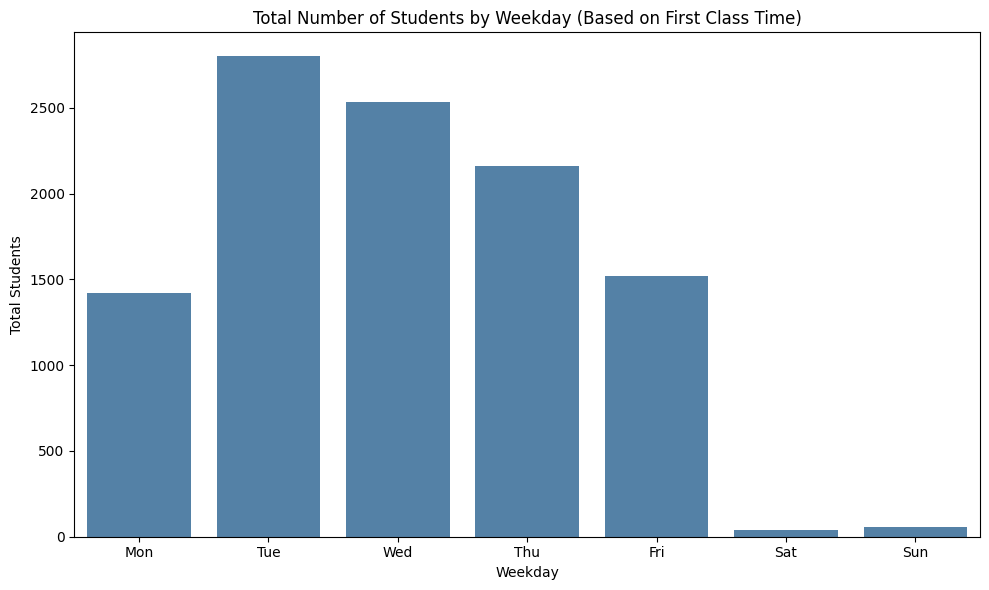

In [ ]:
# 中文 → 英文對應
weekday_map = {"一": "Mon", "二": "Tue", "三": "Wed", "四": "Thu", "五": "Fri", "六": "Sat", "日": "Sun"}

# 設定順序
weekday_order = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

# 建立 weekday 欄位
selected_rooms_df["weekday"] = selected_rooms_df["time_detail"].str[0]

# 統計總人數，並轉為英文
weekday_counts = selected_rooms_df.groupby("weekday")["all_colleges_registered"].sum().reset_index()
weekday_counts["weekday"] = weekday_counts["weekday"].map(weekday_map)
weekday_counts = weekday_counts.set_index("weekday").reindex(weekday_order).reset_index()

# 畫圖
plt.figure(figsize=(10, 6))
sns.barplot(data=weekday_counts, x="weekday", y="all_colleges_registered", color="steelblue")
plt.title("Total Number of Students by Weekday (Based on First Class Time)")
plt.xlabel("Weekday")
plt.ylabel("Total Students")
plt.tight_layout()
plt.show()


In [ ]:
selected_rooms_df.classroom.unique()

array(['商館260210', '商館260714', '商館260712', '商館260306', '寶來國際廳',
       '商館260305', '商館260102', '炎成創新廳', '商館260106', '商館260105', '元大人文廳',
       '寶來科技廳', '商館260205', '商館260312', '商館260207', '商館260206',
       '商館260313', '商館260304', '商館260101', '商館260705', '元大講堂', '商館260815',
       '商館260310', '商館260311', '商館260302', '商館260301', '商館260204',
       '商館261049', '商館260202', '商館261148', '商館260201', '商館260713',
       '商館260809', '商館260709', '商館260914', '商館260909', '商館260913',
       '商館260912', '商館260908', '商館260316', '商館260209', '商館260308',
       '商館260315', '商館260307'], dtype=object)

In [ ]:
import re

def extract_floor_fixed(classroom):
    classroom = str(classroom).strip()

    if classroom.startswith('商館'):
        # 尋找連續6位數字（例如 260210）
        match = re.search(r'\d{6}', classroom)
        if match:
            number_str = match.group()  # '260210'
            floor_digit = number_str[3]  # 取第三位數字表示樓層（2代表2樓）
            return int(floor_digit)
    return 6  # 非商館教室統一設為6

# 套用這個修正邏輯
selected_rooms_df['floor'] = selected_rooms_df['classroom'].apply(extract_floor_fixed)

# 檢查結果
selected_rooms_df[['classroom', 'floor']].drop_duplicates().head()


<ipython-input-20-13df03f32e21>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_rooms_df['floor'] = selected_rooms_df['classroom'].apply(extract_floor_fixed)


,classroom,floor
0,商館260210,2
2,商館260714,7
3,商館260712,7
5,商館260306,3
26,寶來國際廳,6


In [ ]:
selected_rooms_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 383 entries, 0 to 3156
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   subject                  383 non-null    object
 1   teacher                  383 non-null    object
 2   time_detail              383 non-null    object
 3   all_colleges_registered  383 non-null    int64 
 4   classroom                383 non-null    object
 5   weekday                  383 non-null    object
 6   floor                    383 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 23.9+ KB


In [ ]:
selected_rooms_df.head()

,subject,teacher,time_detail,all_colleges_registered,classroom,weekday,floor
0,學術倫理,別蓮蒂,五EFG,24,商館260210,五,2
2,商業資料分析：R運算,侯佩妤,四D56,6,商館260714,四,7
3,AI協作行銷,白佩玉、陳冠儒,二234,16,商館260712,二,7
4,多元職場,胡昌亞,五234,8,商館260712,五,7
5,企業永續、ESG與社會責任,許永明,五234,45,商館260306,五,3


In [ ]:
# 重新定義 df（模擬使用者的原始資料）
# df = pd.DataFrame({
#     "subject": ["學術倫理", "商業資料分析：R建模", "AI協作行銷", "多元職場", "企業永續、ESG與社會責任"],
#     "teacher": ["別蓮蒂", "侯佩妤", "白佩玉、陳冠儒", "胡昌亞", "許永明"],
#     "time_detail": ["五EFG", "四D56", "二234", "五234", "五234"],
#     "all_colleges_registered": [24, 6, 16, 8, 45],
#     "classroom": ["商館260210", "商館260714", "商館260712", "商館260712", "商館260306"],
#     "floor": [2, 7, 7, 7, 3],
# })

df = selected_rooms_df
# 再次執行展開與加總人數的邏輯
expanded_with_count = []
for _, row in df.iterrows():
    weekday = row["time_detail"][0]
    periods = row["time_detail"][1:]
    floor = row["floor"]
    count = row["all_colleges_registered"]
    for p in periods:
        expanded_with_count.append({
            "weekday": weekday,
            "period": p,
            "floor": floor,
            "count": count
        })

count_df = pd.DataFrame(expanded_with_count)

# 加總每一天、每節次、每樓層的人數
grouped = count_df.groupby(["weekday", "period", "floor"], as_index=False)["count"].sum()

# 定義節次時間
period_time_mapping = {
    "A": "06:10-07:00", "B": "07:10-08:00", "1": "08:10-09:00", "2": "09:10-10:00",
    "3": "10:10-11:00", "4": "11:10-12:00", "C": "12:10-13:00", "D": "13:10-14:00",
    "5": "14:10-15:00", "6": "15:10-16:00", "7": "16:10-17:00", "8": "17:10-18:00",
    "E": "18:10-19:00", "F": "19:10-20:00", "G": "20:10-21:00", "H": "21:10-22:00"
}

# 加上時間欄位與格式化顯示
grouped["period_time"] = grouped["period"].map(period_time_mapping)
grouped["period_with_time"] = grouped["period"].astype(str) + " (" + grouped["period_time"].astype(str) + ")"

# 輸出最終表格
final_people_df = grouped[["weekday", "period_with_time", "floor", "count"]].sort_values(by=["weekday", "period_with_time", "floor"])

print(final_people_df)



    weekday period_with_time  floor  count
0         一  1 (08:10-09:00)      8      4
1         一  5 (14:10-15:00)      0      9
2         一  5 (14:10-15:00)      1    180
3         一  5 (14:10-15:00)      2    387
4         一  5 (14:10-15:00)      3    266
..      ...              ...    ...    ...
282       日  3 (10:10-11:00)      6     31
283       日  4 (11:10-12:00)      6     31
284       日  6 (15:10-16:00)      6     24
285       日  7 (16:10-17:00)      6     24
286       日  8 (17:10-18:00)      6     24

[287 rows x 4 columns]


In [ ]:
# 1. 安裝中文字型（Colab 上只需一次）
!apt-get -y install fonts-noto-cjk

# 2. 匯入套件
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import pandas as pd

# 3. 指定字型物件
zh_font = fm.FontProperties(fname="/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc")


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 3s (22.0 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 126111 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
import matplotlib.font_manager as fm

# 列出所有含 "Noto" 或 "CJK" 的字型路徑
for f in fm.findSystemFonts():
    if "Noto" in f or "CJK" in f:
        print(f)


/usr/share/fonts/opentype/noto/NotoSerifCJK-Bold.ttc
/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc
/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc
/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc


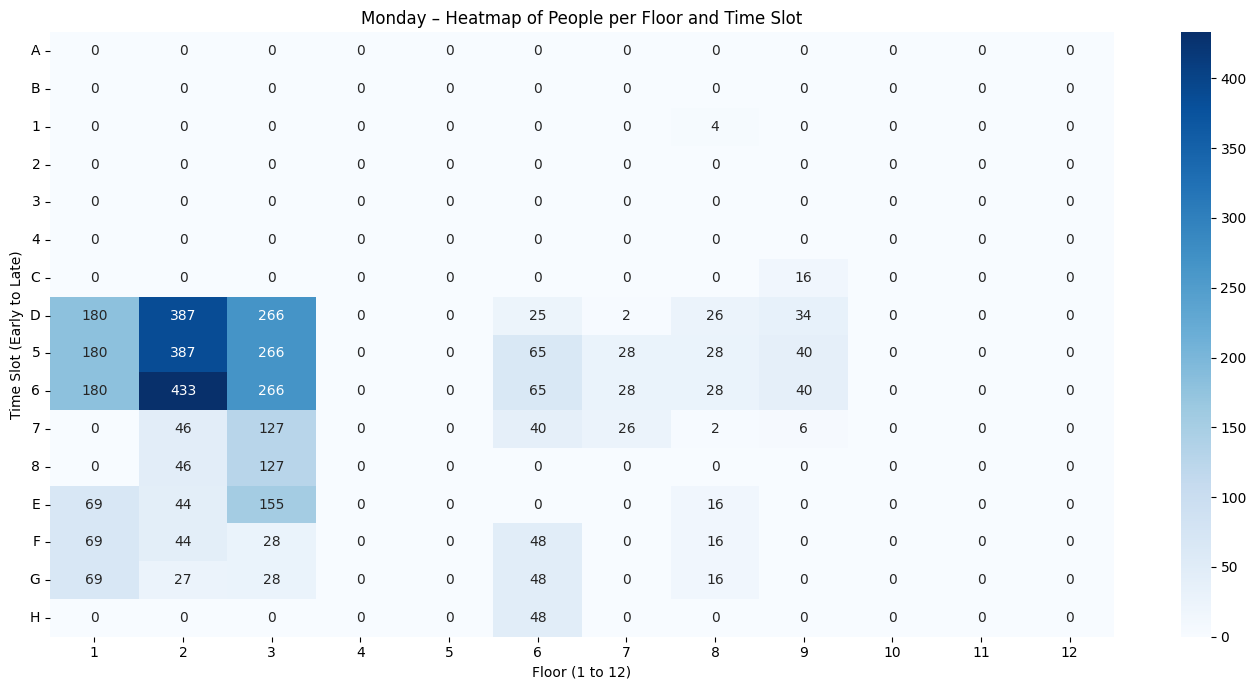

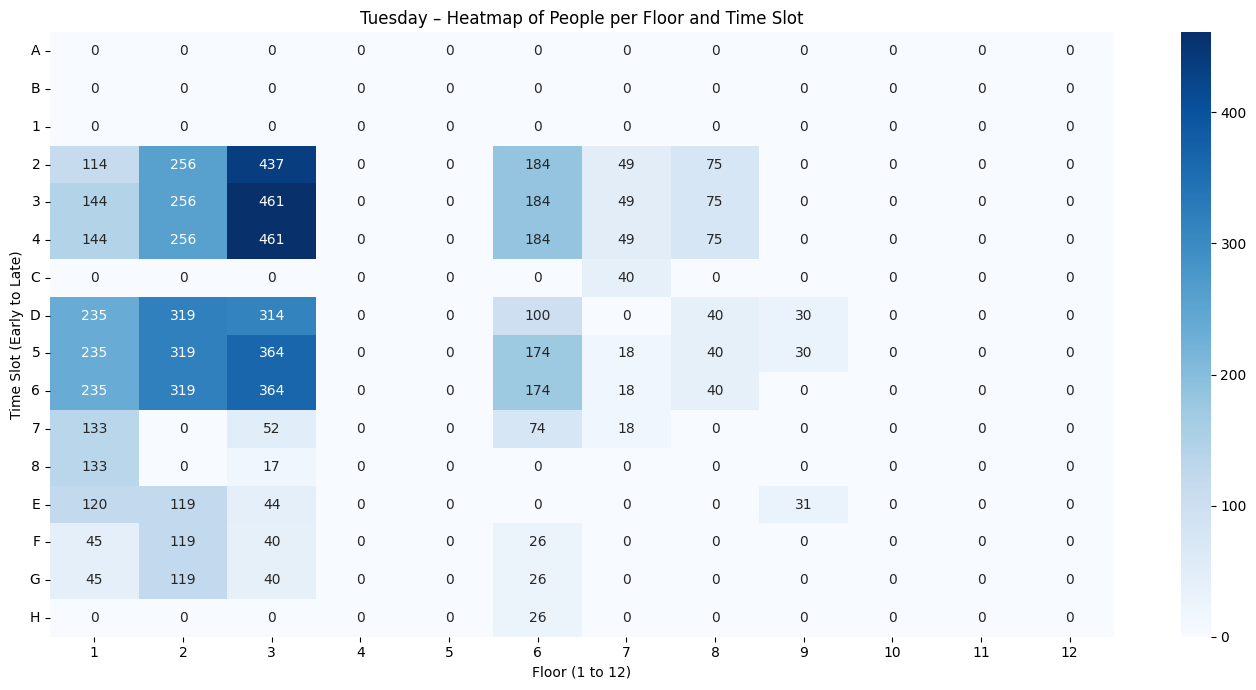

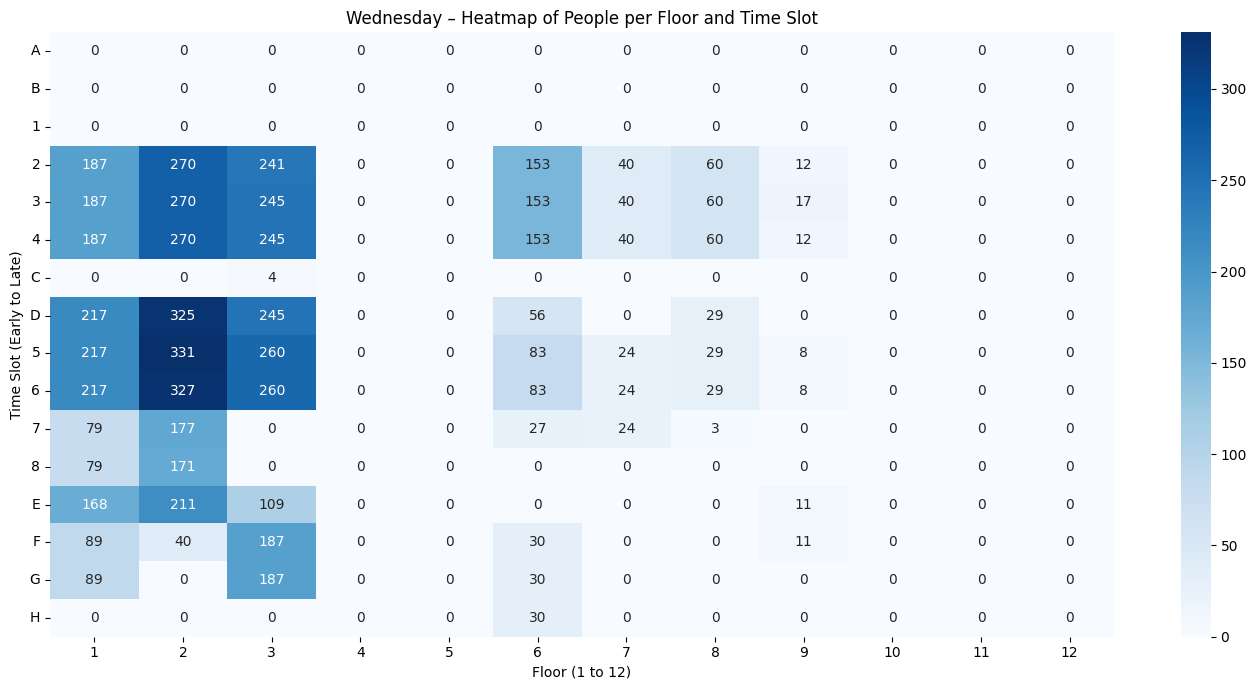

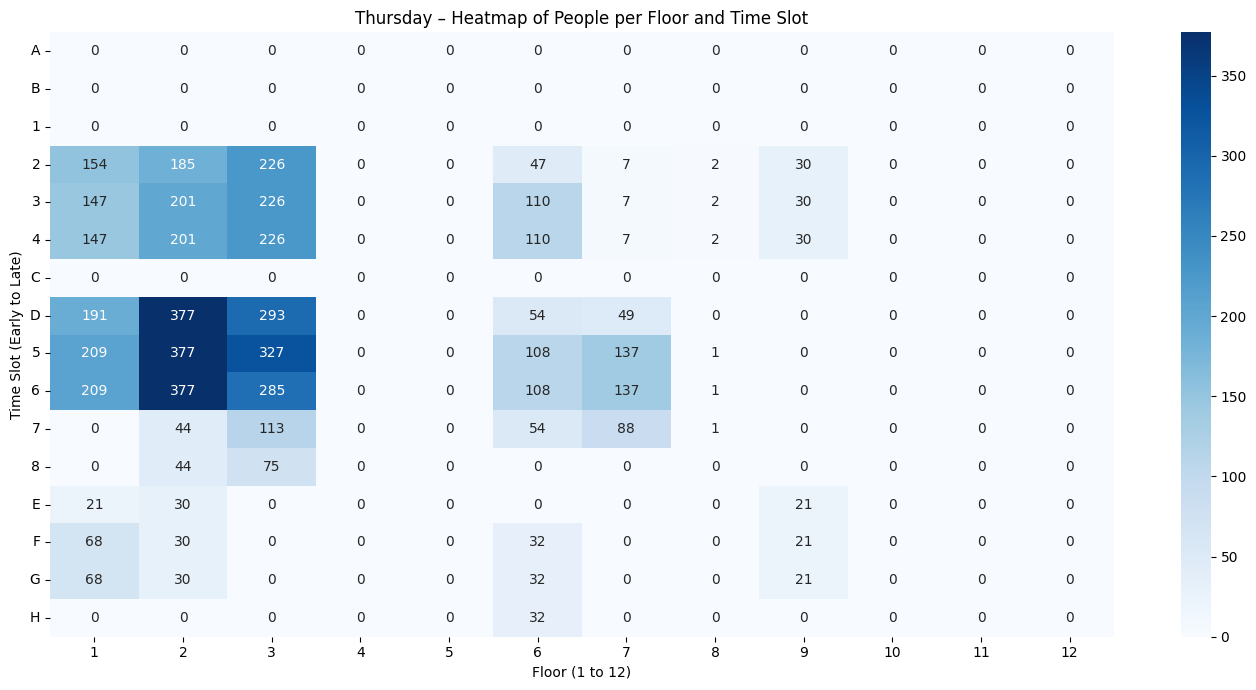

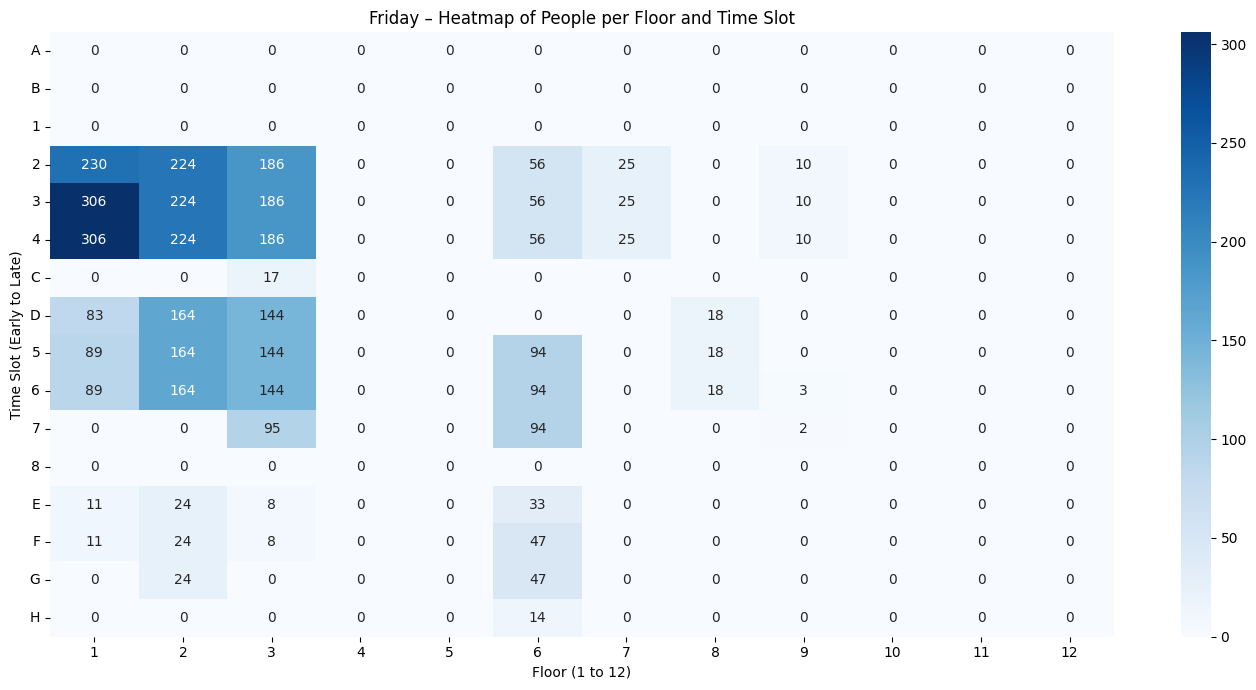

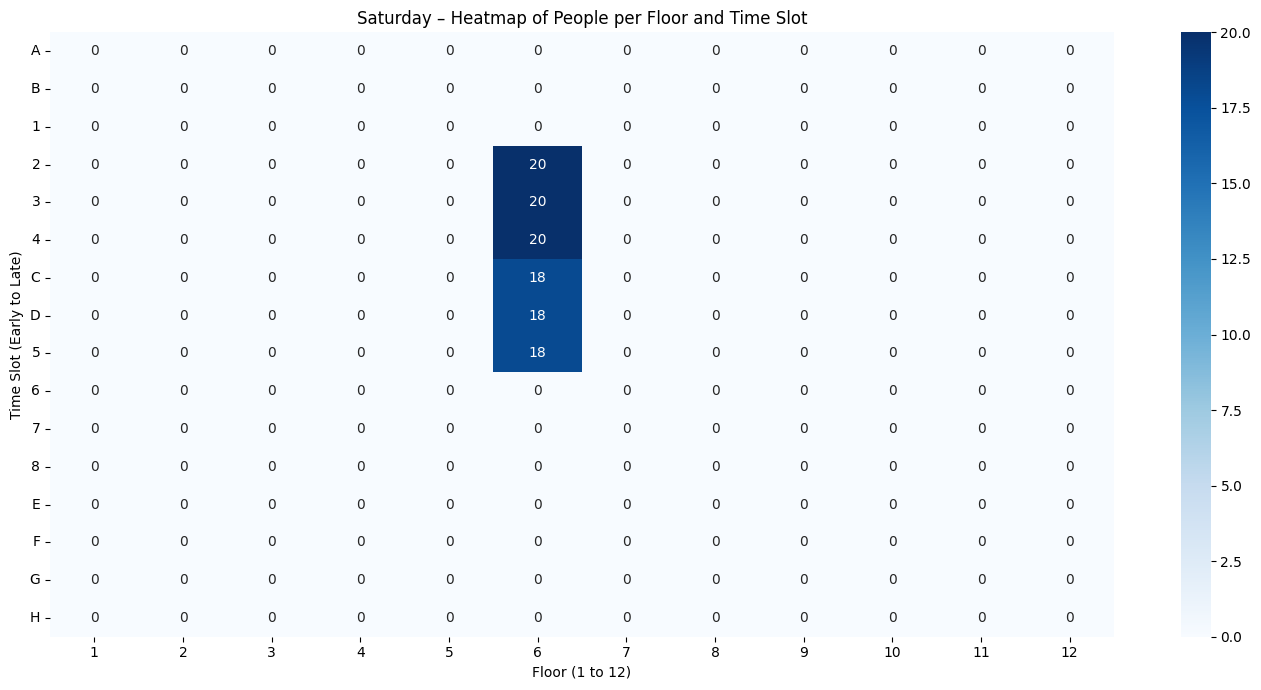

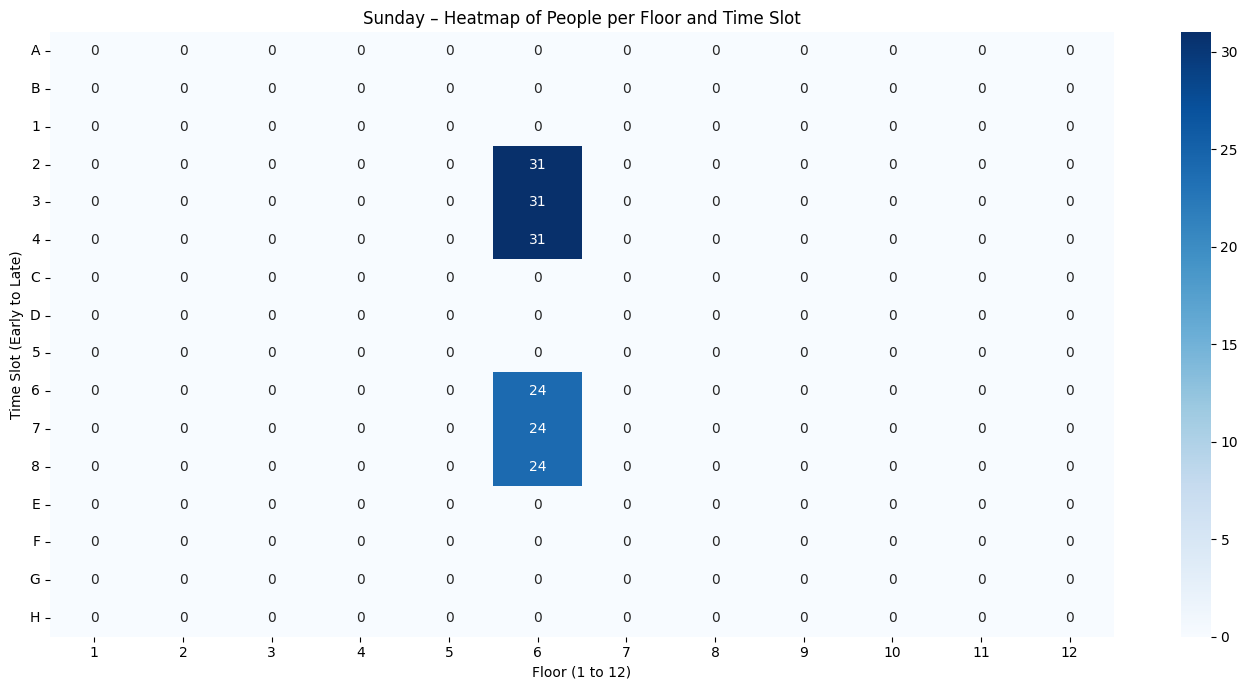

In [ ]:
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

from matplotlib import font_manager as fm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# ✅ 字型改為英文環境預設（如無中文不需設定 zh_font）
# 如果你使用中文字，可以啟用下行：
# zh_font = fm.FontProperties(fname="/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc")

# Extract period from period_with_time
final_people_df["period"] = final_people_df["period_with_time"].str.extract(r"^([A-H1-8])")

# Define order
period_order = ["A", "B", "1", "2", "3", "4", "C", "D", "5", "6", "7", "8", "E", "F", "G", "H"]
all_floors = list(range(1, 13))

# Set correct data types
final_people_df["period"] = pd.Categorical(final_people_df["period"], categories=period_order, ordered=True)
final_people_df["floor"] = final_people_df["floor"].astype(int)
final_people_df["count"] = final_people_df["count"].fillna(0)

# Generate full period-floor combinations
all_combinations = pd.DataFrame(list(itertools.product(period_order, all_floors)), columns=["period", "floor"])

# Chinese weekday to English mapping
weekday_map = {"一": "Monday", "二": "Tuesday", "三": "Wednesday", "四": "Thursday", "五": "Friday", "六": "Saturday", "日": "Sunday"}
weekday_order = ["一", "二", "三", "四", "五", "六", "日"]

# Draw heatmap for each weekday in English
for wd in weekday_order:
    df_day = final_people_df[final_people_df["weekday"] == wd]
    df_day = pd.merge(all_combinations, df_day, on=["period", "floor"], how="left")
    df_day["count"] = df_day["count"].fillna(0)
    pivot_table = df_day.pivot_table(index="period", columns="floor", values="count", aggfunc="sum").reindex(index=period_order, columns=all_floors)

    plt.figure(figsize=(14, 7))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues", cbar=True)
    plt.title(f"{weekday_map[wd]} – Heatmap of People per Floor and Time Slot")
    plt.xlabel("Floor (1 to 12)")
    plt.ylabel("Time Slot (Early to Late)")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
import os

# ✅ 建立儲存資料夾
output_dir = "heatmap_outputs"
os.makedirs(output_dir, exist_ok=True)

# ✅ 畫圖並儲存
for wd in weekday_order:
    df_day = final_people_df[final_people_df["weekday"] == wd]
    df_day = pd.merge(all_combinations, df_day, on=["period", "floor"], how="left")
    df_day["count"] = df_day["count"].fillna(0)
    pivot_table = df_day.pivot_table(index="period", columns="floor", values="count", aggfunc="sum").reindex(index=period_order, columns=all_floors)

    plt.figure(figsize=(14, 7))
    sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="Blues", cbar=True)
    plt.title(f"{weekday_map[wd]} – Heatmap of People per Floor and Time Slot")
    plt.xlabel("Floor (1 to 12)")
    plt.ylabel("Time Slot (Early to Late)")
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()

    # ✅ 儲存圖檔為 PNG
    filename = os.path.join(output_dir, f"heatmap_{wd}.png")
    plt.savefig(filename, dpi=300, bbox_inches='tight')  # 高解析度
    plt.close()  # 不在畫面顯示，直接存圖

In [ ]:
import os
import shutil

# 定義來源與目的地資料夾
src_folder = "/content/heatmap_outputs"
dst_folder = "/content/drive/MyDrive/BPO/每天上課人數"

# 建立目的地資料夾（如果不存在）
os.makedirs(dst_folder, exist_ok=True)

# 搬移每一張 PNG 圖片
for filename in os.listdir(src_folder):
    if filename.endswith(".png"):
        src_path = os.path.join(src_folder, filename)
        dst_path = os.path.join(dst_folder, filename)
        shutil.move(src_path, dst_path)

print("✅ 所有圖片已搬移到 Google 雲端硬碟：", dst_folder)


✅ 所有圖片已搬移到 Google 雲端硬碟： /content/drive/MyDrive/BPO/每天上課人數


In [ ]:
# 找出人數最多的那一筆（即：哪一天哪一節最多人）
max_record = final_people_df.loc[final_people_df["count"].idxmax()]

# 顯示結果
print("🎯 全週人數最多的課：")
print(f"✅ 星期：{max_record['weekday']}")
print(f"✅ 節次與時間：{max_record['period_with_time']}")
print(f"✅ 樓層：{max_record['floor']} 樓")
print(f"✅ 人數：{max_record['count']} 人")


🎯 全週人數最多的課：
✅ 星期：二
✅ 節次與時間：3 (10:10-11:00)
✅ 樓層：3 樓
✅ 人數：461 人
